In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\admin\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.drop(['PassengerId', 'SibSp', 'Parch', 'Cabin', 'Ticket', 'Name'], axis='columns', inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [4]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
Embarked      2
dtype: int64

<Axes: >

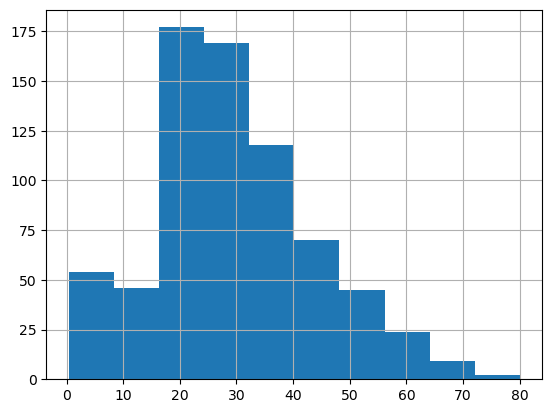

In [5]:
df.Age.hist()

In [6]:
df.Age.mean()



29.69911764705882

In [7]:
df.Age.mode()

0    24.0
Name: Age, dtype: float64

In [8]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [9]:
df = df.dropna()

In [10]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64

<Axes: >

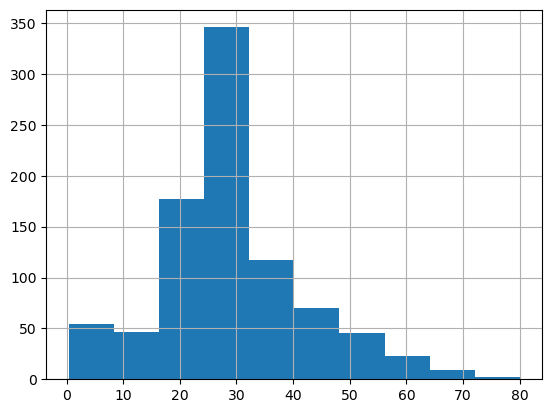

In [11]:
df.Age.hist()

In [12]:
dummies = pd.get_dummies(df[['Sex', 'Embarked']], dtype='int')
dummies.drop('Embarked_S', axis='columns', inplace=True)

In [13]:
df2 = pd.concat([df, dummies], axis='columns')
df2.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q
0,0,3,male,22.0,7.2500,S,0,1,0,0
1,1,1,female,38.0,71.2833,C,1,0,1,0
2,1,3,female,26.0,7.9250,S,1,0,0,0
3,1,1,female,35.0,53.1000,S,1,0,0,0
4,0,3,male,35.0,8.0500,S,0,1,0,0


In [14]:
df2.drop(['Sex', 'Embarked'], axis='columns', inplace=True)
df2.head()

,Survived,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q
0,0,3,22.0,7.2500,0,1,0,0
1,1,1,38.0,71.2833,1,0,1,0
2,1,3,26.0,7.9250,1,0,0,0
3,1,1,35.0,53.1000,1,0,0,0
4,0,3,35.0,8.0500,0,1,0,0


In [15]:
df2.describe()

,Survived,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.315152,32.096681,0.350956,0.649044,0.188976,0.086614
std,0.486260,0.834700,12.984932,49.697504,0.477538,0.477538,0.391710,0.281427
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,7.895800,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,14.454200,0.000000,1.000000,0.000000,0.000000
75%,1.000000,3.000000,35.000000,31.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,3.000000,80.000000,512.329200,1.000000,1.000000,1.000000,1.000000


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [17]:
X = df2.drop('Survived', axis='columns')
y = df2.Survived

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [73]:
#commented for speeding purposes
#svm = SVC(gamma='auto')
#params = {'C': [1],'kernel': ['linear']}
#clf1 =  GridSearchCV(svm, params, cv=5, return_train_score=False)
#clf1.fit(X_train, y_train)
#clf1.score(X_test, y_test)

In [19]:
tree = DecisionTreeClassifier()
params = { 
            'criterion': ['gini', 'entropy'],
            'max_depth': [3, 5, 10],
            'min_samples_split': [3, 5, 10],
            'min_samples_leaf': [3, 5, 10]
         }
clf2 =  GridSearchCV(tree, params, cv=5, return_train_score=False)
clf2.fit(X_train, y_train)
clf2.score(X_test, y_test)

0.8426966292134831

In [57]:
#commented for speeding purposes
#lr = LogisticRegression(max_iter=1000,solver='liblinear', multi_class='auto')
#params = {'C': [5, 10]}
#clf3 =  GridSearchCV(lr, params, cv=5, return_train_score=False)
#clf3.fit(X_train, y_train)
#clf3.score(X_test, y_test)

0.7790262172284644

In [20]:
rf = RandomForestClassifier()
params = {  'n_estimators' : [ 5, 10, 15, 20],
            'criterion': ['gini', 'entropy'],
            'max_depth': [3, 5, 10, 15],
            'min_samples_split': [3, 5, 10, 15],
            'min_samples_leaf': [3, 5, 10, 15]
         }
clf4 =  GridSearchCV(rf, params, cv=5, return_train_score=False)
clf4.fit(X_train, y_train)
clf4.score(X_test, y_test)

0.8651685393258427

In [21]:
df3 = pd.read_csv('test.csv')
df3.shape

(418, 11)

In [22]:
df3.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [23]:
df3['Age'] = df3['Age'].fillna(df3['Age'].median())

In [24]:
dummies2 = pd.get_dummies(df3[['Sex', 'Embarked']], dtype='int')
dummies2.drop(['Embarked_S'], axis='columns', inplace=True)

In [25]:
df4 = pd.concat([df3, dummies], axis='columns')
df4.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q
0,892.0,3.0,"Kelly, Mr. James",male,34.5,0.0,0.0,330911,7.8292,NaN,Q,0.0,1.0,0.0,0.0
1,893.0,3.0,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1.0,0.0,363272,7.0000,NaN,S,1.0,0.0,1.0,0.0
2,894.0,2.0,"Myles, Mr. Thomas Francis",male,62.0,0.0,0.0,240276,9.6875,NaN,Q,1.0,0.0,0.0,0.0
3,895.0,3.0,"Wirz, Mr. Albert",male,27.0,0.0,0.0,315154,8.6625,NaN,S,1.0,0.0,0.0,0.0
4,896.0,3.0,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1.0,1.0,3101298,12.2875,NaN,S,0.0,1.0,0.0,0.0


In [26]:
df4.drop(['PassengerId', 'SibSp', 'Parch', 'Cabin', 'Ticket', 'Name', 'Sex', 'Embarked'], axis='columns', inplace=True)
df4.head()

,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q
0,3.0,34.5,7.8292,0.0,1.0,0.0,0.0
1,3.0,47.0,7.0000,1.0,0.0,1.0,0.0
2,2.0,62.0,9.6875,1.0,0.0,0.0,0.0
3,3.0,27.0,8.6625,1.0,0.0,0.0,0.0
4,3.0,22.0,12.2875,0.0,1.0,0.0,0.0


In [27]:
y_pred = pd.DataFrame(clf2.predict(df4), index=None, columns=['Survived'])
y_pred

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
885,0
886,1
887,1
888,0


In [28]:
final = pd.concat([df3[['PassengerId']], y_pred], axis='columns')
final.dropna(inplace=True)


In [29]:
final['PassengerId'] = final['PassengerId'].astype('int')

In [30]:
final.isna().sum()

PassengerId    0
Survived       0
dtype: int64

In [31]:
final.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,1
3,895,1
4,896,0


In [35]:
final.to_csv('gender_submission.csv', index=False)